In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

action = pd.read_csv("Data/CleanedDataAction.csv")
action.head()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Average,2600,3DS,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X,X360,XOne
0,2013,0,7.02,9.14,0.98,3.97,21.12,8.446,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004,0,9.43,0.40,0.41,10.57,20.81,8.324,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,9.66,5.17,0.06,1.41,16.30,6.520,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2002,0,8.41,5.49,0.47,1.78,16.15,6.460,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,0,4.12,6.77,0.39,2.08,13.36,5.344,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
#calculate average sales for action genre from 1997 to 2011
data = {'Year': [],
        'Average Sales': [],
        'Global_Sales': []} #changed here
sales = pd.DataFrame(data)
year = 1997
for i in range(15):
    x = action[action['Year_of_Release'] == year]
    avg = x['Average'].mean()
    globalsales = x['Global_Sales'].mean()
    
    data = {'Year': year,
            'Average Sales': avg,
            'Global_Sales': globalsales}
    sales = sales.append(data, ignore_index=True)
    year += 1

sales['Year'] = sales['Year'].astype(int) 
sales

,Year,Average Sales,Global_Sales
0,1997,1.726000,4.313333
1,1998,2.287000,5.717500
2,1999,1.997000,4.995000
3,2000,1.380800,3.452000
4,2001,2.145000,5.361667
5,2002,1.988000,4.970000
6,2003,1.216800,3.040000
7,2004,3.792000,9.483333
8,2005,1.808800,4.522000
9,2006,1.685600,4.214000


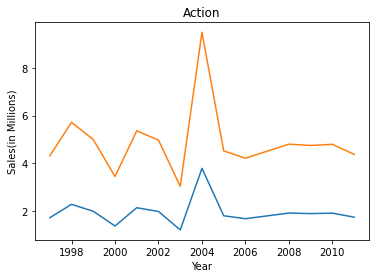

In [5]:
#sales plot
plt.plot(sales['Year'], sales['Average Sales'], sales['Year'], sales['Global_Sales'])
plt.title('Action')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()

In [6]:
#for SVR algorithm
# scikit-learn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

y = action['Average'] #output
ygl = action['Global_Sales']
X = np.array(action['Year_of_Release']).reshape(-1,1) #input

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
Xgl_train, Xgl_test, ygl_train, ygl_test = train_test_split(X, ygl, test_size=0.2) #changed here

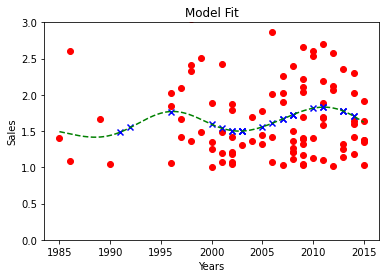

In [19]:
model = SVR(kernel='rbf', epsilon=0.25, gamma='scale')
modelgl = SVR(kernel='rbf', epsilon=0.85, gamma='scale')

model.fit(X_train, y_train)
modelgl.fit(Xgl_train, ygl_train)
prediction = model.predict(X_test)
predictiongl = modelgl.predict(Xgl_test)
# model.score(X_test, y_test)

# prediction

X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))


# plt.scatter(X_test, prediction)
# plt.scatter(X_test, y_test)
plt.ylim(top=3)
plt.title('Model Fit')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, model.predict(X_grid), color='green')
plt.scatter(X_test, prediction, color='blue', marker='x')
plt.show()  #why you do dis???

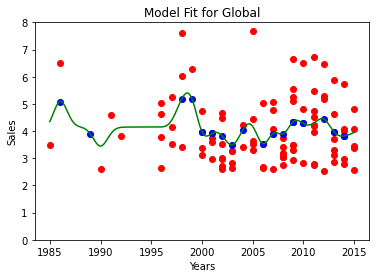

In [89]:
Xgl_grid = np.arange(min(Xgl_train), max(Xgl_train), 0.01) #change 0.01 to 1 and plot to scatter at 1 to see changes
Xgl_grid = Xgl_grid.reshape((len(Xgl_grid), 1)) 

plt.ylim(top=8)
plt.title('Model Fit for Global')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.scatter(Xgl_train, ygl_train, color='red')
plt.plot(Xgl_grid, modelgl.predict(Xgl_grid), color='green') #1
plt.scatter(Xgl_test, predictiongl, color='blue')
plt.show()  #why you do dis???

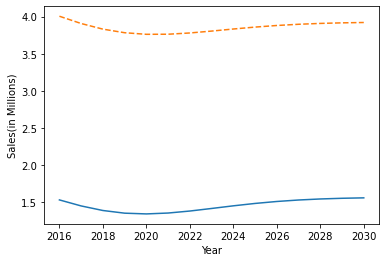

In [26]:
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
data = {'Prediction_Year': [],
        'Predicted_Sales': [],
        'Global': []}
future_sales = pd.DataFrame(data)
future_sales['Prediction_Year'] = future_sales['Prediction_Year'].astype(int)

for i in range(15):
    x = model.predict([[year[i]]])
    xgl = modelgl.predict([[year[i]]])
    data = {'Prediction_Year': year[i],
            'Predicted_Sales': x,
            'Global': xgl}
    future_sales = future_sales.append(data, ignore_index=True)

plt.plot(future_sales['Prediction_Year'], future_sales['Predicted_Sales'])
plt.plot(future_sales['Prediction_Year'], future_sales['Global'], ls = '--')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()

#better fits data but constant prediction.. why??

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import statistics

rmse = sqrt(mean_squared_error(y_test, prediction))
print(rmse)
#normalized
scaler = MinMaxScaler()
y_test = scaler.fit_transform(np.array(y_test).reshape(-1, 1))
prediction = scaler.fit_transform(np.array(prediction).reshape(-1, 1))
print(mean_squared_error(y_test, prediction))
rmse_normalized = sqrt(mean_squared_error(y_test, prediction))
print('|||',rmse_normalized,'|||')

1.1107396906428033
0.3303801442214602
||| 0.5747870424961407 |||


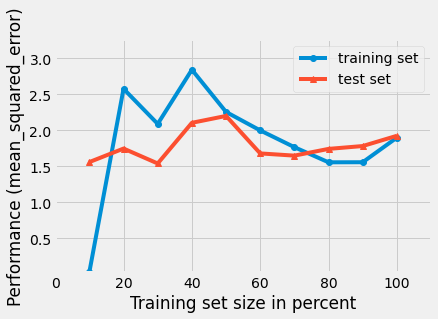

In [92]:
from mlxtend.plotting import plot_learning_curves

#change C and epsilon values
#over, under and best fit

clf = SVR(kernel='rbf')
# clf2 = LinearRegression()

plot_learning_curves(X_train, y_train, X_test, y_test, clf, scoring='mean_squared_error', print_model=False)
plt.show()

In [93]:
import joblib

filename = 'savedModels/action.joblib'
joblib.dump(model, filename)

['savedModels/action.joblib']

In [94]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        })
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
best_params

{'C': 100, 'epsilon': 0.1, 'gamma': 0.005}